**Car Damage Classifier**

In Car Insurance industry, a lot of money is being wasted on Claims leakage. Claims leakage is the gap between the optimal and actual settlement of a claim. Visual inspection and validation are being used to reduce claims leakage. But doing inspection might take a long time and result in delaying of claims processing. An automated system for doing inspection and validation will be of great help in speeding up the process.

This Car Damage Classifier can help to find if car has some damage or not.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

**1 Requried Module**

In [ ]:
# Importing requeried module
import cv2
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from tensorflow.keras.preprocessing import image
from keras.layers import Dense, Activation,Dropout,Conv2D, MaxPool2D ,Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint

**2 Loading Input Data**

In [ ]:
# Path for required input data
train_data= "/content/drive/MyDrive/Car-damage-classifier/data1a/training"
val_data = "/content/drive/MyDrive/Car-damage-classifier/data1a/validation"

train_dam=os.path.join(train_data,'00-damage')
train_whole=os.path.join(train_data,'01-whole')

val_dam=os.path.join(val_data,'00-damage')
val_whole=os.path.join(val_data,'01-whole')

**3 Total Number of image in train dataset**

In [ ]:
print("Total Number of Damage Car images", len(os.listdir(train_dam)))
print("Total Number of undamage Car images", len(os.listdir(train_whole)))

Total Number of Damage Car images 920
Total Number of undamage Car images 920


**4 Let view some images from dataset**

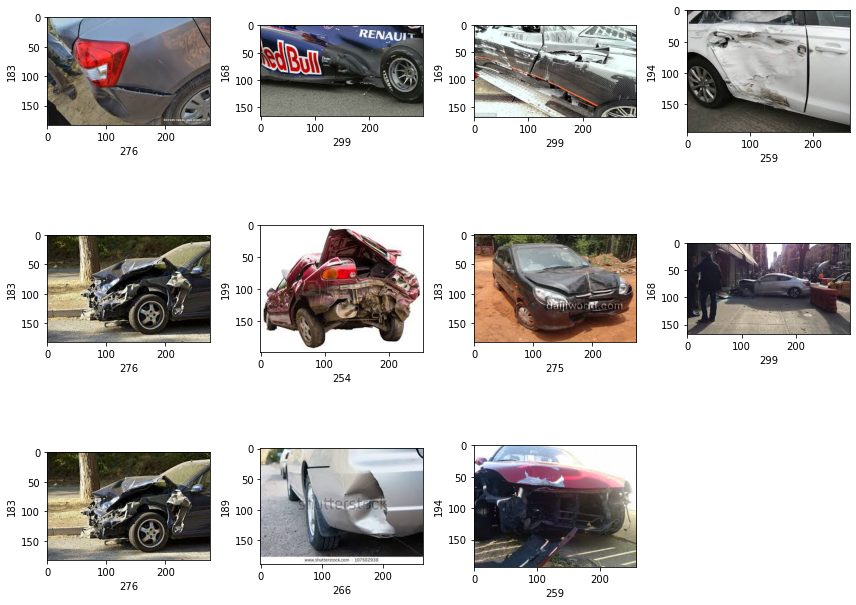

In [ ]:
# Plotting 12 images of damage car
plt.figure(figsize=(12,12))
for i in range(1,12):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img =plt.imread(train_dam +'/'+ random.choice(sorted(os.listdir(train_dam))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

**5 Resizing all the image**

All images are of different size so we have to resize all image to train over model

In [ ]:
# Let take tow empty list
dim1 = []
dim2 = []
#Finding dimention of all images
for i in range(0,40):
    labels = train_dam
    image_path = os.listdir(labels)
    for x in image_path:
        img =cv2.imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

In [ ]:
#Print the mean of all dimension of images:
print("Dimension 1 Mean : ",np.mean(dim1),"Dimension 2 Mean",np.mean(dim2))

Dimension 1 Mean :  191.1891304347826 Dimension 2 Mean 266.2315217391304


In [ ]:
# resize all images
train = ImageDataGenerator(rescale = 1/255)
val = ImageDataGenerator(rescale = 1/255)

# Converting images to 190,266  size and using a batch size of 30 for training and validation sets
train_set = train.flow_from_directory(train_data,  target_size=(190, 260), batch_size=32, class_mode='binary')
validation_set = val.flow_from_directory(val_data,target_size=(190, 260),batch_size=32,class_mode='binary')


Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


**Model Building**

In [ ]:
# Define Convolutional neural network

model = Sequential()

# Input Layer
model.add(Conv2D(32,(3,3), input_shape =(190,260,3),activation = 'relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

# hidden layer1
model.add(Conv2D(64,(3,3), input_shape =(190,260,3),activation = 'relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

# hidden layer2
model.add(Conv2D(128,(3,3), input_shape =(190,260,3),activation = 'relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

# This layer will flatten the rectified image into 1D array it is allso output layer
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))


In [ ]:
# Will give complete detail of cnn model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 190, 260, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 95, 130, 32)      0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 95, 130, 32)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 95, 130, 64)       18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 47, 65, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 47, 65, 64)       

**Model Training**

In [ ]:

model.compile(loss = "binary_crossentropy",optimizer="adam",metrics=["accuracy"])
EarlyStop = EarlyStopping( monitor= "val_loss",mode = "min",verbose = 1, patience= 1,min_delta = 0)
modelcheck = ModelCheckpoint("best_model.hdf5",monitor= "val_accuracy",verbose = 1,save_best_only=True)

In [ ]:
history = model.fit(train_set,validation_data = validation_set, epochs = 20, callbacks=(EarlyStop,modelcheck) ,batch_size= 32)

Epoch 1/20
58/58 [==============================] - ETA: 0s - loss: 1.7446 - accuracy: 0.5201
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to best_model.hdf5
58/58 [==============================] - 385s 7s/step - loss: 1.7446 - accuracy: 0.5201 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/20
58/58 [==============================] - ETA: 0s - loss: 0.6835 - accuracy: 0.5658
Epoch 2: val_accuracy improved from 0.50000 to 0.59783, saving model to best_model.hdf5
58/58 [==============================] - 254s 4s/step - loss: 0.6835 - accuracy: 0.5658 - val_loss: 0.6756 - val_accuracy: 0.5978
Epoch 3/20
58/58 [==============================] - ETA: 0s - loss: 0.6406 - accuracy: 0.6484
Epoch 3: val_accuracy improved from 0.59783 to 0.70652, saving model to best_model.hdf5
58/58 [==============================] - 248s 4s/step - loss: 0.6406 - accuracy: 0.6484 - val_loss: 0.6114 - val_accuracy: 0.7065
Epoch 4/20
58/58 [==============================] - ETA: 0s - loss:

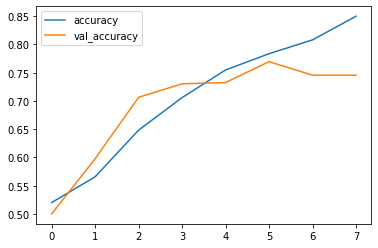

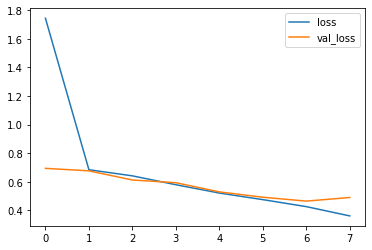

In [ ]:
# Ploting train and test loss graph
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy','val_accuracy']].plot()
evaluation[['loss','val_loss']].plot()

[[0.]]


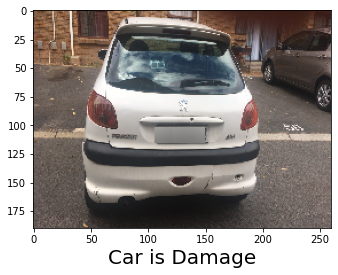

In [ ]:
# Output Prediction function to identify wether the car is damage or not
def output_prediction(img_path):

  # read image data
  img = image.load_img(img_path, target_size = (190,260))
  plt.imshow(img)
  Y = image.img_to_array(img)
  X = np.expand_dims(Y, axis = 0)
  val = model.predict(X)
  print(val)
  if val< 0.5:
    plt.xlabel("Car is Damage",fontsize = 20)
  else:
    plt.xlabel("Car is not Damage",fontsize = 20)

output_prediction("/content/drive/MyDrive/Carscan/Assignment-main/Damage Identification/images/1.jpg")



[[0.]]


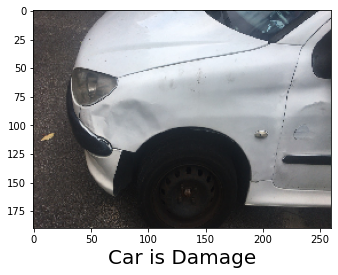

In [ ]:
output_prediction("/content/drive/MyDrive/Carscan/Assignment-main/Damage Identification/images/2.jpg")

[[1.]]


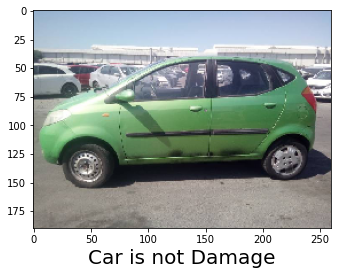

In [ ]:
output_prediction("/content/drive/MyDrive/Carscan/Assignment-main/Data Visualization/images/1.jpg")